In [1]:
import sys, platform, os
from matplotlib import pyplot as plt

import numpy as np

import camb
from camb import model, initialpower

from astropy.cosmology import Planck18 as cosmo

In [2]:
import matplotlib as mpl
from matplotlib import rc

SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('xtick', direction='in')
plt.rc('ytick', direction='in')

plt.rc('text', usetex=True)
plt.rc('font', size=11)

label_size = 13
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams.update({'font.size': label_size})

ftsize = 25

In [3]:
cosmo

FlatLambdaCDM(name="Planck18", H0=67.66 km / (Mpc s), Om0=0.30966, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.04897)

In [4]:
kmax = 0.3
kmin = 0.001

In [5]:
#Planck18, TT,TE,EE,lowE+lensing+BAO
Obh2 = 0.02242
Och2 = 0.11933
Omh2 = 0.14240
h = 0.6766
ns = 0.9665
log10e10_As = 3.047
tau = 0.0561

#--------------------------
As = np.exp(log10e10_As)/1e10
Ob = Obh2/h**2
Oc = Och2/h**2
Om = Omh2/h**2

print(As)
print(Oc)
print(Ob)
print(Om)

mnu = 0.06
Onu = mnu/(93.14*h**2)

z_eff = 1.

#--------------------------
kmax=kmax
k_per_logint = 30
npoints = 200
minkh = kmin

pars = camb.CAMBparams()
pars.set_cosmology(H0=h*100, ombh2=Obh2, omch2=Och2, tau=tau, mnu = mnu, \
                   nnu = 3.046, num_massive_neutrinos = 1, omk = 0.)
pars.set_dark_energy(w=-1.)
pars.InitPower.set_params(As=As, ns=ns, r=0.)


pars.set_matter_power(redshifts=[0., z_eff], kmax=kmax, k_per_logint=k_per_logint)
pars.NonLinear = model.NonLinear_none

results = camb.get_results(pars)

kh, z, pk = results.get_matter_power_spectrum(minkh=minkh, maxkh=kmax, npoints = npoints, \
                                              var1 = 'delta_tot', var2 = 'delta_tot')

s8 = np.array(results.get_sigma8())
print(s8)

kh_1, pk_1 = kh, pk[-1, :]

2.105209331337507e-09
0.26066675992680977
0.04897468161869667
0.3110613141169673
Note: redshifts have been re-sorted (earliest first)
[0.49115492 0.80670261]


In [6]:
#Baryon dark matter
Obh2 = 0.02242 + 0.11933
Och2 = 0.
Omh2 = Obh2 + Och2
h = 0.6766
ns = 0.9665
log10e10_As = 3.047
tau = 0.0561

#--------------------------
As = np.exp(log10e10_As)/1e10
Ob = Obh2/h**2
Oc = Och2/h**2
Om = Omh2/h**2

print(As)
print(Oc)
print(Ob)
print(Om)

mnu = 0.0
Onu = mnu/(93.14*h**2)

z_eff = 1.

#--------------------------
kmax = kmax
k_per_logint = 30
npoints = 200
minkh = kmin

pars = camb.CAMBparams()
pars.set_cosmology(H0=h*100, ombh2=Obh2, omch2=Och2, tau=tau, mnu = mnu, \
                   nnu = 3.046, num_massive_neutrinos = 1, omk = 0.)
pars.set_dark_energy(w=-1.)
pars.InitPower.set_params(As=As, ns=ns, r=0.)


pars.set_matter_power(redshifts=[0., z_eff], kmax=kmax, k_per_logint=k_per_logint)
pars.NonLinear = model.NonLinear_none

results = camb.get_results(pars)

kh, z, pk = results.get_matter_power_spectrum(minkh=minkh, maxkh=kmax, npoints = npoints, \
                                              var1 = 'delta_tot', var2 = 'delta_tot')


s8 = np.array(results.get_sigma8())
print(s8)

kh_2, pk_2 = kh, pk[-1, :]

2.105209331337507e-09
0.0
0.30964144154550644
0.30964144154550644
Note: redshifts have been re-sorted (earliest first)
[0.09557859 0.15705163]


In [7]:
#Hot dark matter
Obh2 = 0.02242
Onuh2 = 0.11933
Och2 = 0
Omh2 = Obh2 + Onuh2 + Och2
h = 0.6766
ns = 0.9665
log10e10_As = 3.047
tau = 0.0561

#--------------------------
As = np.exp(log10e10_As)/1e10
Ob = Obh2/h**2
Oc = Och2/h**2
Om = Omh2/h**2

print(As)
print(Oc)
print(Ob)
print(Om)

mnu = Onuh2*93.14
print('Mnu:', mnu)

z_eff = 1.

#--------------------------
kmax = kmax
k_per_logint = 30
npoints = 200
minkh = kmin

pars = camb.CAMBparams()
pars.set_cosmology(H0=h*100, ombh2=Obh2, omch2=Och2, tau=tau, mnu = mnu, \
                   nnu = 3.046, num_massive_neutrinos = 1, omk = 0.)
pars.set_dark_energy(w=-1.)
pars.InitPower.set_params(As=As, ns=ns, r=0.)


pars.set_matter_power(redshifts=[0., z_eff], kmax=kmax, k_per_logint=k_per_logint)
pars.NonLinear = model.NonLinear_none

results = camb.get_results(pars)

kh, z, pk = results.get_matter_power_spectrum(minkh=minkh, maxkh=kmax, npoints = npoints, \
                                              var1 = 'delta_tot', var2 = 'delta_tot')


s8 = np.array(results.get_sigma8())
print(s8)

kh_3, pk_3 = kh, pk[-1, :]

2.105209331337507e-09
0.0
0.04897468161869667
0.30964144154550644
Mnu: 11.1143962
Note: redshifts have been re-sorted (earliest first)
[0.16264222 0.26726736]


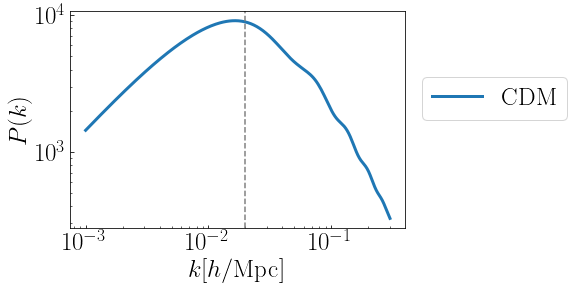

In [8]:
plt.loglog(kh_1, pk_1, lw = 3, label = '$\mathrm{CDM}$')
plt.ylabel('$P(k)$', fontsize=ftsize)
plt.xlabel('$k [h/\mathrm{Mpc}]$', fontsize=ftsize)

plt.tick_params(axis='both', which='major', labelsize=ftsize)
plt.tick_params(axis='both', which='minor', labelsize=ftsize)

plt.legend(fontsize=ftsize, loc = (1.05, 0.5))

plt.axvline(0.02, linestyle='dashed', color='gray')

plt.show()


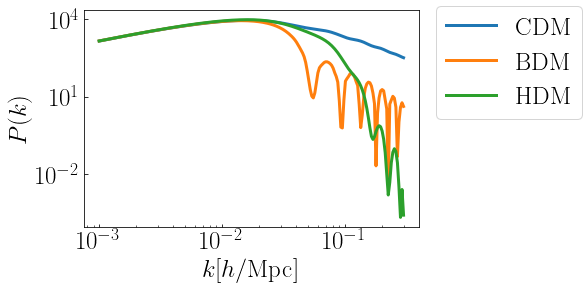

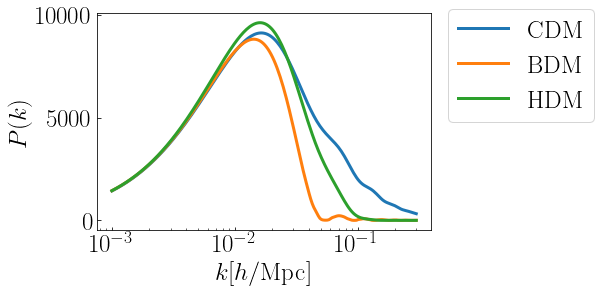

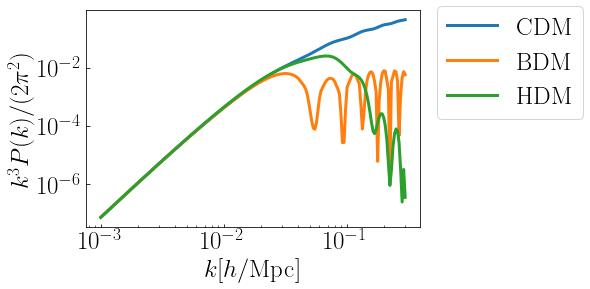

In [9]:
plt.loglog(kh_1, pk_1, lw = 3, label = '$\mathrm{CDM}$')
plt.loglog(kh_2, pk_2, lw = 3, label = '$\mathrm{BDM}$')
plt.loglog(kh_3, pk_3, lw = 3, label = '$\mathrm{HDM}$')

plt.ylabel('$P(k)$', fontsize=ftsize)
plt.xlabel('$k [h/\mathrm{Mpc}]$', fontsize=ftsize)

#plt.xlim(right = 0.3)
#plt.ylim(bottom = 10**(-4.2))

plt.tick_params(axis='both', which='major', labelsize=ftsize)
plt.tick_params(axis='both', which='minor', labelsize=ftsize)

plt.legend(fontsize=ftsize, loc = (1.05, 0.5))

#plt.savefig('Pk_what_if.png', dpi = 300, bbox_inches='tight')
plt.show()

plt.plot(kh_1, pk_1, lw = 3, label = '$\mathrm{CDM}$')
plt.plot(kh_2, pk_2, lw = 3, label = '$\mathrm{BDM}$')
plt.plot(kh_3, pk_3, lw = 3, label = '$\mathrm{HDM}$')

plt.xscale('log')

plt.ylabel('$P(k)$', fontsize=ftsize)
plt.xlabel('$k [h/\mathrm{Mpc}]$', fontsize=ftsize)

plt.tick_params(axis='both', which='major', labelsize=ftsize)
plt.tick_params(axis='both', which='minor', labelsize=ftsize)

plt.legend(fontsize=ftsize, loc = (1.05, 0.5))

plt.tick_params(axis='both', which='major', labelsize=ftsize)
plt.tick_params(axis='both', which='minor', labelsize=ftsize)

plt.show()

plt.plot(kh_1, kh_1**3*pk_1/(2*np.pi**2), lw = 3, label = '$\mathrm{CDM}$')
plt.plot(kh_2, kh_2**3*pk_2/(2*np.pi**2), lw = 3, label = '$\mathrm{BDM}$')
plt.plot(kh_3, kh_3**3*pk_3/(2*np.pi**2), lw = 3, label = '$\mathrm{HDM}$')

plt.yscale('log')
plt.xscale('log')

plt.ylabel('$k^3 P(k)/(2 \pi^2)$', fontsize=ftsize)
plt.xlabel('$k [h/\mathrm{Mpc}]$', fontsize=ftsize)

plt.tick_params(axis='both', which='major', labelsize=ftsize)
plt.tick_params(axis='both', which='minor', labelsize=ftsize)

plt.legend(fontsize=ftsize, loc = (1.05, 0.5))

plt.tick_params(axis='both', which='major', labelsize=ftsize)
plt.tick_params(axis='both', which='minor', labelsize=ftsize)

plt.show()

# Two-point Correlation Function (2PCF)

In [10]:
from mcfit import P2xi
from scipy.interpolate import make_interp_spline

In [11]:
kh_log = np.logspace(np.log10(kmin), np.log10(kmax), 200)

pk_1_func = make_interp_spline(kh_1, pk_1)
pk_2_func = make_interp_spline(kh_2, pk_2)
pk_3_func = make_interp_spline(kh_3, pk_3)

pk_1_log = pk_1_func(kh_log)
pk_2_log = pk_2_func(kh_log)
pk_3_log = pk_3_func(kh_log)

x_1, xi_1 = P2xi(kh_log, l = 0, lowring = True)(pk_1_log, extrap = True)
x_2, xi_2 = P2xi(kh_log, l = 0, lowring = True)(pk_2_log, extrap = True)
x_3, xi_3 = P2xi(kh_log, l = 0, lowring = True)(pk_3_log, extrap = True)

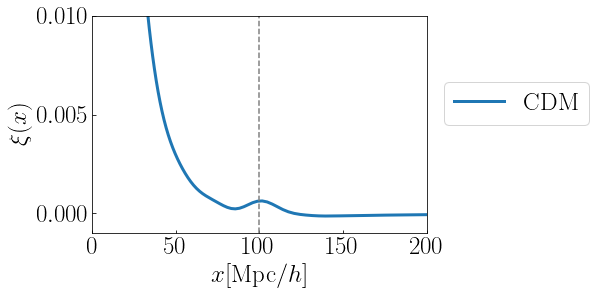

In [12]:
plt.plot(x_1, xi_1, lw=3, label = '$\mathrm{CDM}$')

plt.ylim(-0.001,0.01)
plt.xlim(0, 200)

plt.ylabel('$\\xi(x)$', fontsize=ftsize)
plt.xlabel('$x [\mathrm{Mpc}/h]$', fontsize=ftsize)

plt.tick_params(axis='both', which='major', labelsize=ftsize)
plt.tick_params(axis='both', which='minor', labelsize=ftsize)

plt.axvline(100, linestyle='dashed', color='gray')

plt.legend(fontsize=ftsize, loc = (1.05, 0.5))

plt.show()


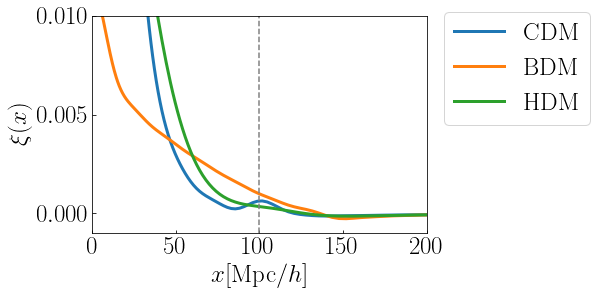

In [13]:
plt.plot(x_1, xi_1, lw=3, label = '$\mathrm{CDM}$')
plt.plot(x_2, xi_2, lw=3, label = '$\mathrm{BDM}$')
plt.plot(x_3, xi_3, lw=3, label = '$\mathrm{HDM}$')

plt.ylim(-0.001,0.01)
plt.xlim(0, 200)

plt.ylabel('$\\xi(x)$', fontsize=ftsize)
plt.xlabel('$x [\mathrm{Mpc}/h]$', fontsize=ftsize)

plt.tick_params(axis='both', which='major', labelsize=ftsize)
plt.tick_params(axis='both', which='minor', labelsize=ftsize)


plt.axvline(100, linestyle='dashed', color='gray')

plt.legend(fontsize=ftsize, loc = (1.05, 0.5))

plt.show()
